In [1]:
import requests 
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
vijesti = []

for i in range(0, 52):
    web_url = requests.get(f'https://www.klix.ba/pretraga?str={i}&q=vik%20vodovod')
    soup = BeautifulSoup(web_url.text, 'lxml')
    
    articles = soup.find_all('article')
    
    for article in articles:
        podnaslov_element = article.find('div', class_='font-title uppercase inline text-xs mb-0 md:mb-1 text-vijesti')
        if podnaslov_element:
            podnaslov = podnaslov_element.text.strip()
        else:
            podnaslov = None
        glavni_naslov = article.find('h2', class_='font-title text-tiny lg:text-base xl:text-lg leading-tight md:leading-tight dark:text-gray-300 dark:hover:text-white').text
        paragraf_vijesti = article.find('p', class_='hidden md:block text-base mt-2 text-gray-500 truncate').text 
        datum_objave = article.find('div', class_='flex-1 text-sm').text.replace('\n', ' ').strip()
        
        vijesti.append([podnaslov, glavni_naslov, paragraf_vijesti, datum_objave])

print(vijesti)

[['Kvar otklonjen', 'Normalizuje se vodosnabdijevanje u Sarajevu nakon 26-satnog prekida', 'Jutros oko 7 sati vodosnabdijevanje je normalizovano u 90 posto domaćinstava koja nisu imali vode duže od 24 sata u Sarajevu.', '1 dan'], ['Prekid od 26 sati', 'ViK u 01:30: Kvar popravljen - voda puštena u sistem; Građani u 6 sati: Vode još nema', 'Komunalno preduzeće "Vodovod i kanalizacija" tokom noći saopćio je da je završen popravak kvara na glavnom potisnom cjevovodu i da se voda počela puštati u sistem oko 01:30 sati.', '1 dan'], ['Skoro 24 sata', 'Radovi na izvorištu Bačevo u Sarajevu nastavit će se duboko u noć, građani i dalje bez vode', 'Radnici preduzeća Vodovod i kanalizacija Sarajevo (ViK) nastavit će duboko u noć raditi na otklanjanju kvarova i sanaciji glavnog cjevovoda na izvorištu Bačevo, potvrđeno je za Klix.ba.', '1 dan'], ['Sarajevo', 'ViK objavio snimak radova na izvorištu Bačevo, radnici i dalje saniraju kvar', 'Na službenoj stranici preduzeća Vodovod i kanalizacija (ViK) 

In [3]:
data_frame=pd.DataFrame(vijesti, columns=['Podnaslov', 'Glavni naslov', 'Prvi paragraf', 'Datum objave vijesti']) 
data_frame.to_csv('klix_ViK_v.csv')
data_frame=pd.read_csv('klix_ViK_v.csv')

In [7]:
df=data_frame.drop('Unnamed: 0', axis=1)

In [8]:
df

,Podnaslov,Glavni naslov,Prvi paragraf,Datum objave vijesti
0,Kvar otklonjen,Normalizuje se vodosnabdijevanje u Sarajevu na...,Jutros oko 7 sati vodosnabdijevanje je normali...,1 dan
1,Prekid od 26 sati,ViK u 01:30: Kvar popravljen - voda puštena u ...,"Komunalno preduzeće ""Vodovod i kanalizacija"" t...",1 dan
2,Skoro 24 sata,Radovi na izvorištu Bačevo u Sarajevu nastavit...,Radnici preduzeća Vodovod i kanalizacija Saraj...,1 dan
3,Sarajevo,"ViK objavio snimak radova na izvorištu Bačevo,...",Na službenoj stranici preduzeća Vodovod i kana...,1 dan
4,Bačevo,Sanacija glavnog vodovodnog cjevovoda u Saraje...,Preduzeće Vodovod i kanalizacija iz Sarajeva o...,2 dana
...,...,...,...,...
503,Trebaju li voda i grijanje biti skuplji,Jekauc: Naša vlast vodi seljačku politiku,Velika bura se digla nakon što je Vlada Kanton...,10.11.2011. u 17:59
504,Nakon teksta Sarajevo-x.com,Sarajevo: Otklonjen kvar na kanalizaciji u Mil...,Kvar na kanalizacionoj mreži u ulici Milinklad...,15.06.2011. u 21:35
505,"""Tekući problemi""",Niz Milinkladsku ulicu u Sarajevu teče kanaliz...,Stanari Milinkladske ulice u općini Novo Saraj...,09.06.2011. u 21:56
506,Problem zasad riješen,"Vodovodu uključena struja, voda sigurna za upo...",Električna energija je jutros u 9 sati ponovo ...,20.04.2011. u 11:05


In [9]:
df.isnull().sum()

Podnaslov               24
Glavni naslov            0
Prvi paragraf            0
Datum objave vijesti     0
dtype: int64

In [10]:
#NaN/data cleaning 
null_podnaslov=df['Podnaslov'].isnull().sum()
total_df=len(df)
procenat=100
procenat_null_podataka=null_podnaslov/total_df*100
print(f'Procenat null podataka je: {procenat_null_podataka.round(2)}')

Procenat null podataka je: 4.72


In [12]:
df[df.isnull().any(axis=1)]

,Podnaslov,Glavni naslov,Prvi paragraf,Datum objave vijesti
36,NaN,Zastupnica SBiH predložila da Kanton Sarajevo ...,Zastupnica SBiH-a u Skupštini Kantona Sarajevo...,17.05.2023. u 17:44
45,NaN,Sarajevski ViK: Prošle godine smo naplatili re...,Sarajevsko preduzeće Vodovod i kanalizacija (V...,30.01.2023. u 09:13
53,NaN,ViK u augustu naplatio skoro 5 miliona KM raču...,"Kantonalno javno komunalno preduzeće ""Vodovod ...",20.10.2022. u 07:29
66,NaN,U Sarajevu će uskoro poskupjeti i voda,"Ministar komunalne privrede, infrastrukture, p...",02.06.2022. u 09:05
69,NaN,Jaroslav Černi - Pionir elektrifikacije Jugosl...,Jaroslav Černi je Sarajlija češkog porijekla k...,03.04.2022. u 23:42
71,NaN,Poskupljenje struje za više od 300 posto komun...,Udruženje preduzeća komunalne privrede Federac...,28.12.2021. u 13:40
126,NaN,Sarajevo: Tokom pandemije koronavirusa ViK-u s...,Sarajevsko preduzeće Vodovod i kanalizacija (V...,30.06.2020. u 11:29
130,NaN,Domaćinstva u Kantonu Sarajevo u martu potroši...,S obzirom na to da je održavanje higijene i re...,14.04.2020. u 15:49
133,NaN,Sarajevski ViK zainteresovan za ideju sarajevs...,KJKP Vodovod i kanalizacija zainteresirano je ...,20.02.2020. u 13:25
134,NaN,Koliko građani BiH koriste elektronske račune ...,Usluga elektronskog računa tzv. eRačun nalazi ...,08.02.2020. u 07:05


In [13]:
from datetime import datetime

def convert_to_unix(date_str):
    # The date format seems to be 'dd.mm.yyyy. u HH:MM'
    # We need to handle the '1 dan' case differently, so let's check for that
    if date_str.strip() == '1 dan':
        # Handle the '1 dan' case, perhaps by returning None or some default date
        return (int(datetime.now().timestamp()))
    elif date_str.strip() == '2 dana':
        return (int(datetime.now().timestamp() - 86400)) # take away 24 hours
    else:
        # Convert to datetime object
        date_time_obj = datetime.strptime(date_str, '%d.%m.%Y. u %H:%M')
        # Convert to UNIX timestamp
        timestamp = (int(date_time_obj.timestamp()))
        return timestamp

df.loc[:, 'unix_timestamp'] = df['Datum objave vijesti'].apply(convert_to_unix)

In [39]:
def convert_timestamp_to_date(unix_timestamp):
    """Converts UNIX timestamp to a date string in YYYY-MM-DD format."""
    return datetime.fromtimestamp(unix_timestamp).strftime('%Y-%m-%d')

# First, convert UNIX timestamps to human-readable dates
df.loc[:, 'day'] = df['unix_timestamp'].apply(convert_timestamp_to_date)

# Group by the 'day' column and count the number of articles per day
# Then multiply by 100 to assign points to each article
grouped_data = df.groupby('day').size() * 1

# Convert the grouped data into the required calendar_chart format
calendar_chart = [{"value": value, "day": day} for day, value in grouped_data.items()]

# The 'calendar_chart' variable now contains the data in the required format
print(calendar_chart)
print(grouped_data)

[{'value': 1, 'day': '2009-07-30'}, {'value': 1, 'day': '2011-04-20'}, {'value': 1, 'day': '2011-06-09'}, {'value': 1, 'day': '2011-06-15'}, {'value': 1, 'day': '2011-11-10'}, {'value': 1, 'day': '2011-12-16'}, {'value': 1, 'day': '2011-12-26'}, {'value': 1, 'day': '2012-01-31'}, {'value': 1, 'day': '2012-02-08'}, {'value': 1, 'day': '2012-02-09'}, {'value': 1, 'day': '2012-08-04'}, {'value': 1, 'day': '2012-08-09'}, {'value': 2, 'day': '2012-08-24'}, {'value': 1, 'day': '2012-09-21'}, {'value': 1, 'day': '2012-10-09'}, {'value': 1, 'day': '2012-10-16'}, {'value': 1, 'day': '2013-01-07'}, {'value': 1, 'day': '2013-04-03'}, {'value': 1, 'day': '2013-04-23'}, {'value': 1, 'day': '2013-04-27'}, {'value': 1, 'day': '2013-06-27'}, {'value': 1, 'day': '2013-07-17'}, {'value': 1, 'day': '2013-08-06'}, {'value': 1, 'day': '2013-08-15'}, {'value': 1, 'day': '2013-08-27'}, {'value': 1, 'day': '2013-09-23'}, {'value': 1, 'day': '2013-10-22'}, {'value': 1, 'day': '2013-10-31'}, {'value': 1, 'day':

In [14]:
df

,Podnaslov,Glavni naslov,Prvi paragraf,Datum objave vijesti,unix_timestamp
0,Kvar otklonjen,Normalizuje se vodosnabdijevanje u Sarajevu na...,Jutros oko 7 sati vodosnabdijevanje je normali...,1 dan,1707852926
1,Prekid od 26 sati,ViK u 01:30: Kvar popravljen - voda puštena u ...,"Komunalno preduzeće ""Vodovod i kanalizacija"" t...",1 dan,1707852926
2,Skoro 24 sata,Radovi na izvorištu Bačevo u Sarajevu nastavit...,Radnici preduzeća Vodovod i kanalizacija Saraj...,1 dan,1707852926
3,Sarajevo,"ViK objavio snimak radova na izvorištu Bačevo,...",Na službenoj stranici preduzeća Vodovod i kana...,1 dan,1707852926
4,Bačevo,Sanacija glavnog vodovodnog cjevovoda u Saraje...,Preduzeće Vodovod i kanalizacija iz Sarajeva o...,2 dana,1707766526
...,...,...,...,...,...
503,Trebaju li voda i grijanje biti skuplji,Jekauc: Naša vlast vodi seljačku politiku,Velika bura se digla nakon što je Vlada Kanton...,10.11.2011. u 17:59,1320944340
504,Nakon teksta Sarajevo-x.com,Sarajevo: Otklonjen kvar na kanalizaciji u Mil...,Kvar na kanalizacionoj mreži u ulici Milinklad...,15.06.2011. u 21:35,1308166500
505,"""Tekući problemi""",Niz Milinkladsku ulicu u Sarajevu teče kanaliz...,Stanari Milinkladske ulice u općini Novo Saraj...,09.06.2011. u 21:56,1307649360
506,Problem zasad riješen,"Vodovodu uključena struja, voda sigurna za upo...",Električna energija je jutros u 9 sati ponovo ...,20.04.2011. u 11:05,1303290300


In [16]:
import numpy as np; np.random.seed(sum(map(ord, 'calplot')))
import calplot
import matplotlib.pyplot as plt


AttributeError: QuadMesh.set() got an unexpected keyword argument 'start'

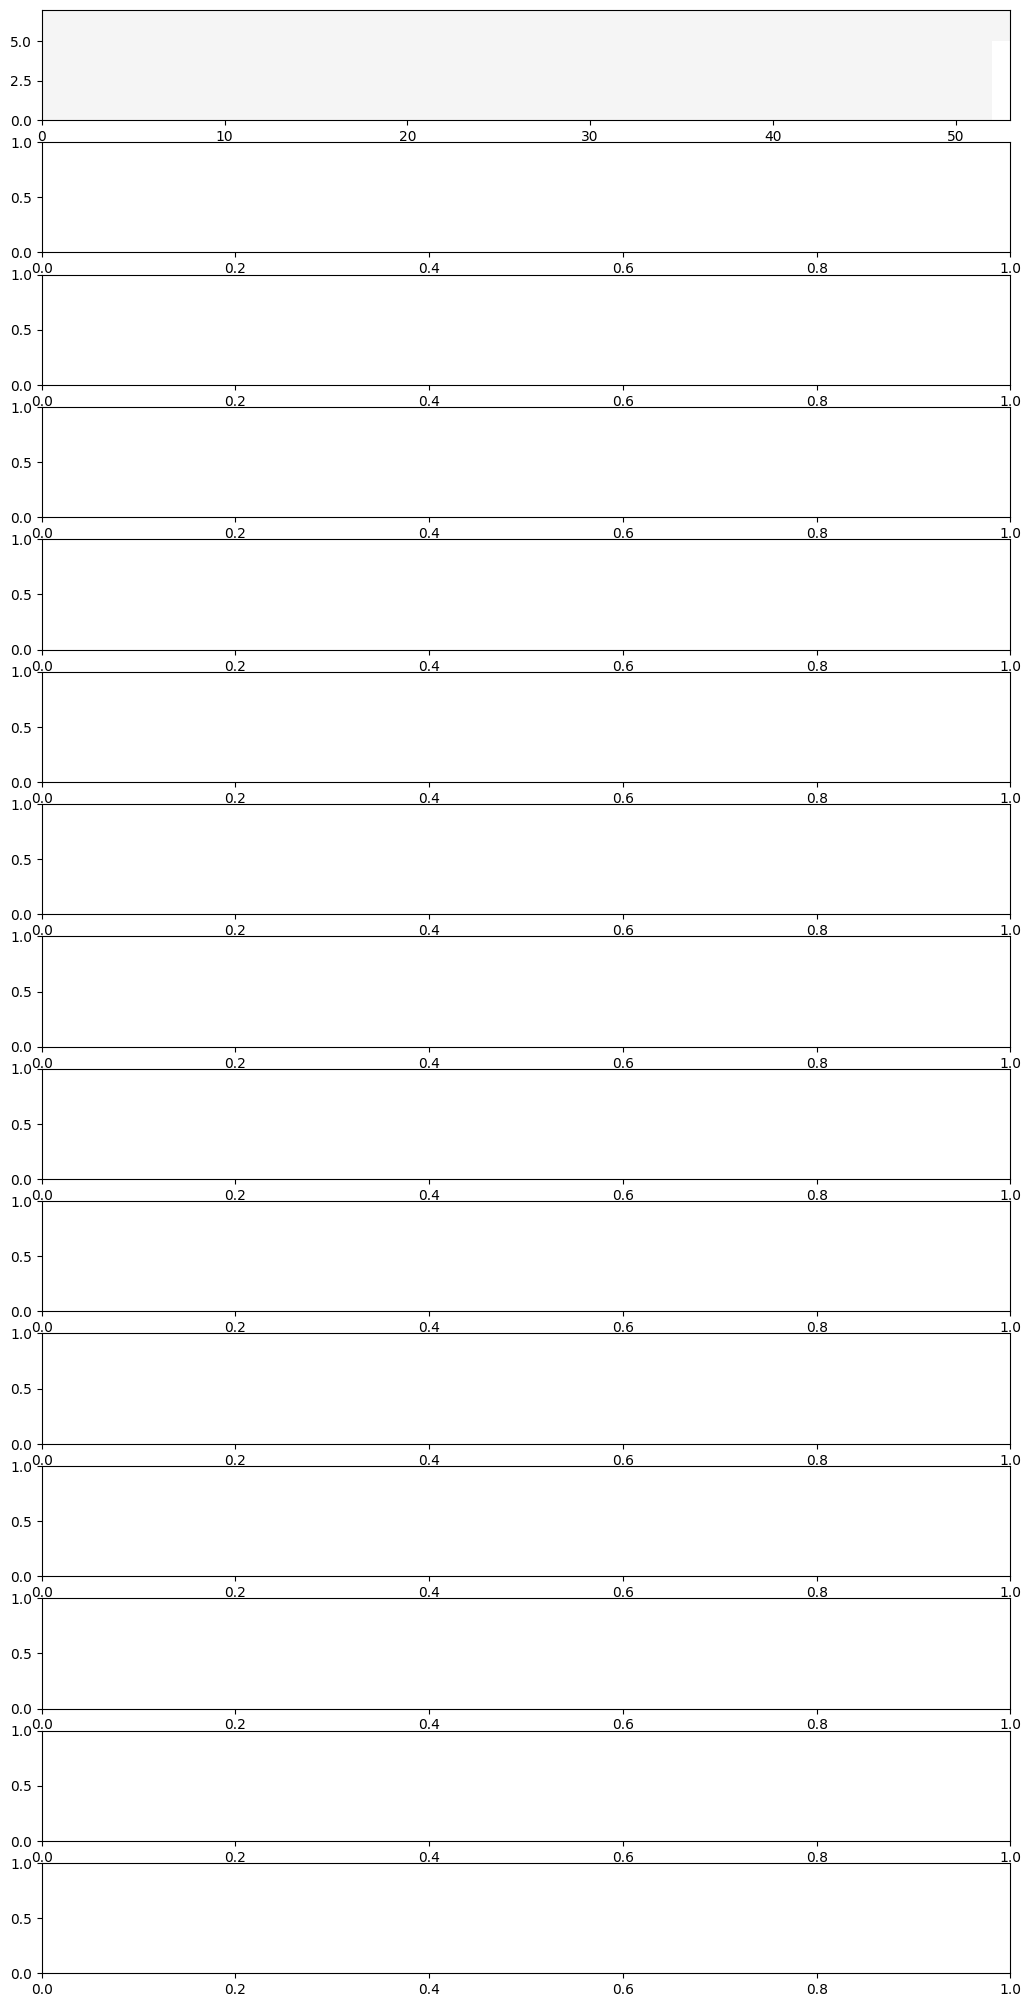

In [47]:
grouped_data.index = pd.to_datetime(grouped_data.index)
start_date = grouped_data.index.min()
end_date = grouped_data.index.max()
calplot.calplot(grouped_data,
                yearascending = False,
                suptitle = 'Calendar',
                suptitle_kws = {'x': 0, 'y': 5},
                tight_layout=True)
                # start=grouped_data.index.min(),
                # end=grouped_data.index.max())
plt.show()

In [21]:
import numpy as np; np.random.seed(1)
import pandas as pd

# Sequence of dates
days = pd.date_range('01/01/2020', periods = 1277, freq = 'D')

# Pandas time series with random data for each day
values = pd.Series(np.random.randn(len(days)), index = days)

In [22]:
values

2020-01-01    1.624345
2020-01-02   -0.611756
2020-01-03   -0.528172
2020-01-04   -1.072969
2020-01-05    0.865408
                ...   
2023-06-26   -0.312603
2023-06-27    0.101203
2023-06-28   -1.111818
2023-06-29   -1.186552
2023-06-30    1.623462
Freq: D, Length: 1277, dtype: float64